In [1]:
import os

os.chdir("/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder")

In [2]:
!pwd

/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder


In [3]:
import random

import cv2
import matplotlib.pyplot as plt
import numpy as np

from scripts.training import data_loading as dl

%load_ext autoreload
%autoreload 2


/home/aneta/Desktop/GSN/code/edge-aware-face-autoencoder/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
DATASET_PATH = os.path.join(os.getcwd(), "data", "dataset", "train")

In [5]:
dataset = dl.CelebAFaceAutoencoderDataset(dataset_root=DATASET_PATH)

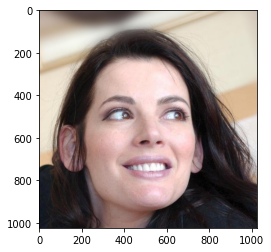

In [6]:
img = dataset[48]

plt.imshow(img)


In [7]:
def show_sample(img):
    fig, axis = plt.subplots(1, 3, figsize=(15, 15))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1=30, threshold2=100)
    axis[0].imshow(img)
    axis[1].imshow(gray, cmap="gray")
    axis[2].imshow(edges, cmap="gray")

    return edges
    
    

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


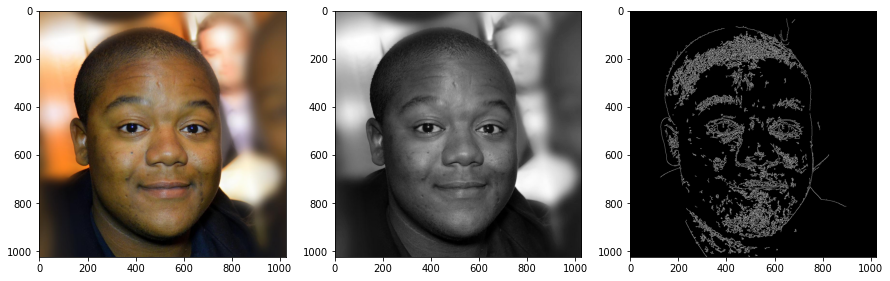

In [8]:
img = dataset[2]

edges = show_sample(img)
print(edges)
assert len(edges[edges != 0]) == len(edges[edges == 255])

In [9]:
def show_n_samples(n):
    fig, axis = plt.subplots(n, 3, figsize=(15, n*5))
    for i in range(0, n):
        img = dataset[random.randrange(0, len(dataset), 1)]
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, threshold1=30, threshold2=100)
        axis[i, 0].imshow(img)
        axis[i, 1].imshow(gray, cmap="gray")
        axis[i, 2].imshow(edges, cmap="gray")

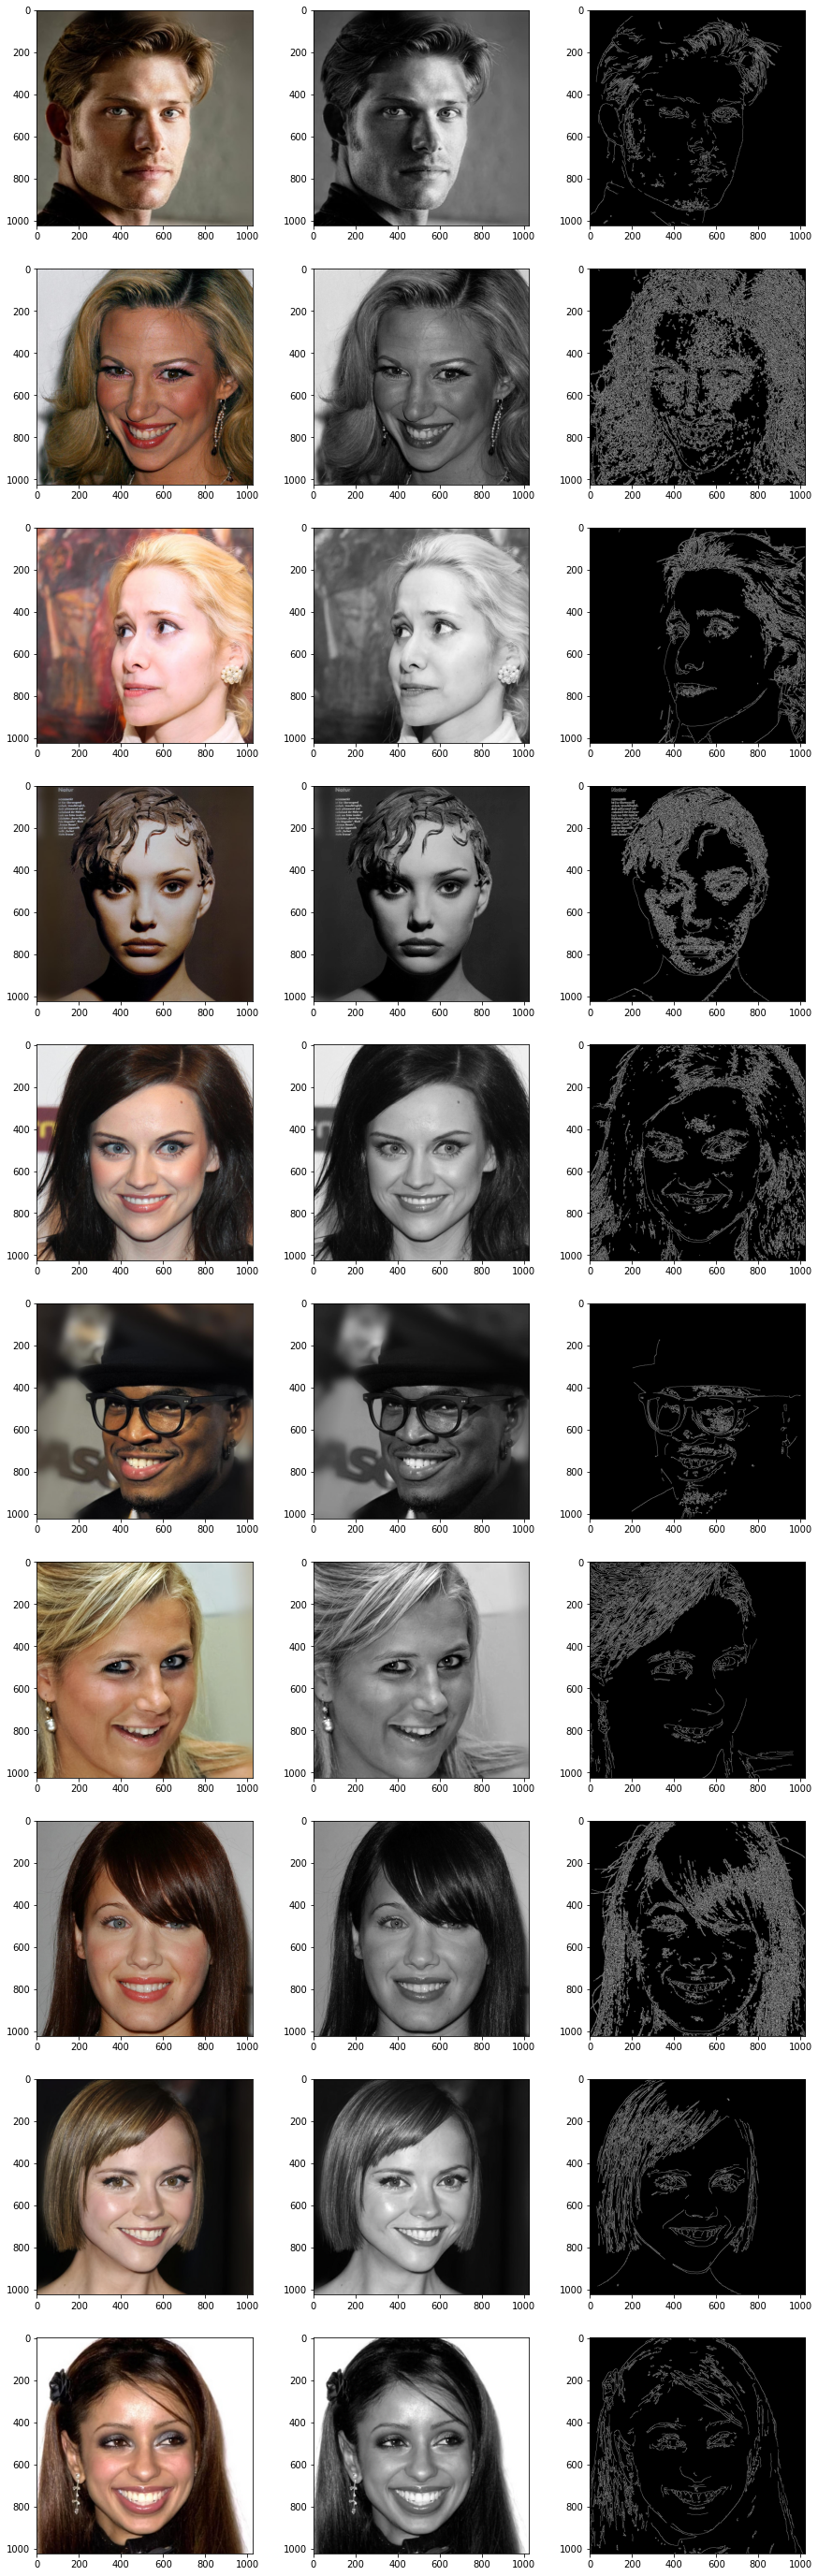

In [10]:
show_n_samples(10)

In [11]:
def show_edges(vec = None, tr1 = 30, tr2 = 100):
    row_num = 3
    col_num = 5
    fig, axis = plt.subplots(row_num, col_num, figsize=(col_num*4, row_num*4))

    for i in range(row_num):
        for j in range(col_num):
            if vec is None:
                img = dataset[random.randrange(0, len(dataset), 1)]
            else:
                img = dataset[vec[i*col_num + j]]
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            edges = cv2.Canny(gray, threshold1=tr1, threshold2=tr2)
            axis[i, j].imshow(edges, cmap="gray")

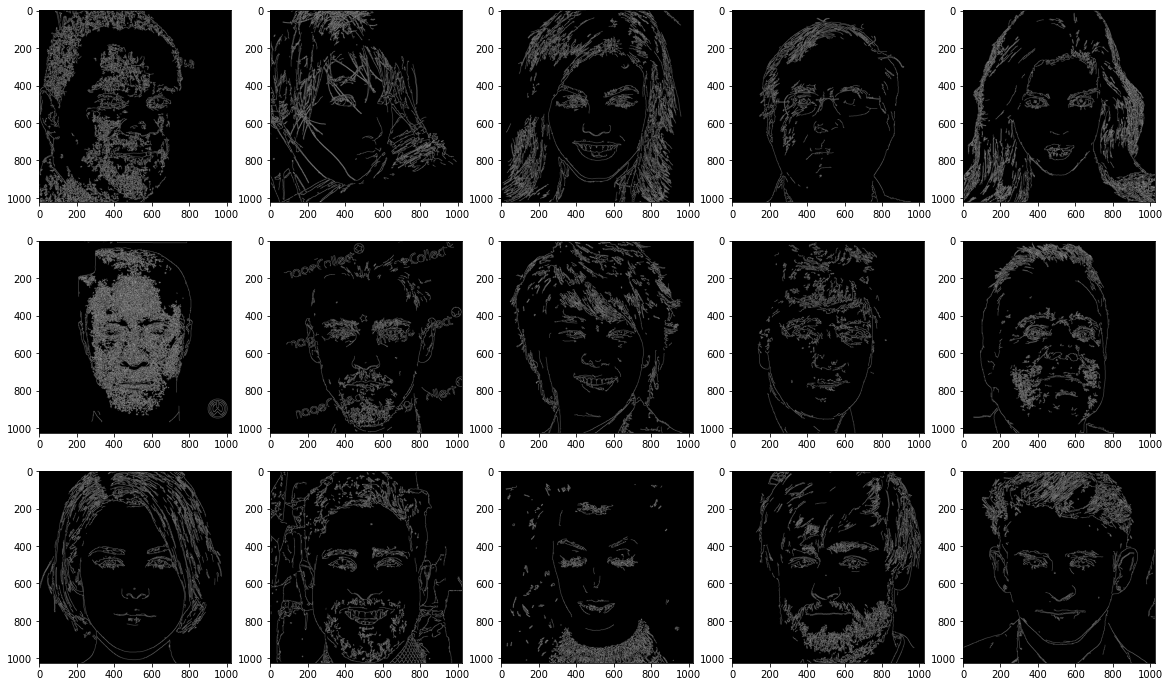

In [12]:
show_edges()

In [13]:
def find_treshold(img, tr1_vec = [10, 15, 20, 25, 30], tr2_vec = [80, 100, 130, 170, 200]):
    # wiersz - stała wartość treshold1
    # kolumna - stała wartość treshold2
    row_num = 5
    col_num = 5
    fig, axis = plt.subplots(row_num, col_num, figsize=(col_num*4, row_num*4))

    for i in range(row_num):
        tr1 = tr1_vec[i]
        for j in range(col_num):
            tr2 = tr2_vec[j]
            #img = dataset[random.randrange(0, len(dataset), 1)]
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            edges = cv2.Canny(gray, threshold1=tr1, threshold2=tr2)
            axis[i, j].imshow(edges, cmap="gray")
            axis[i, j].set_title("tr1 = {}, tr2 = {}".format(tr1, tr2))

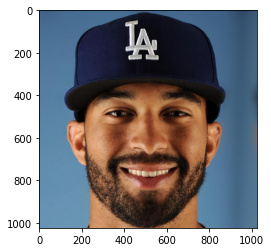

In [14]:
img = dataset[5864]
#5839
plt.imshow(img)

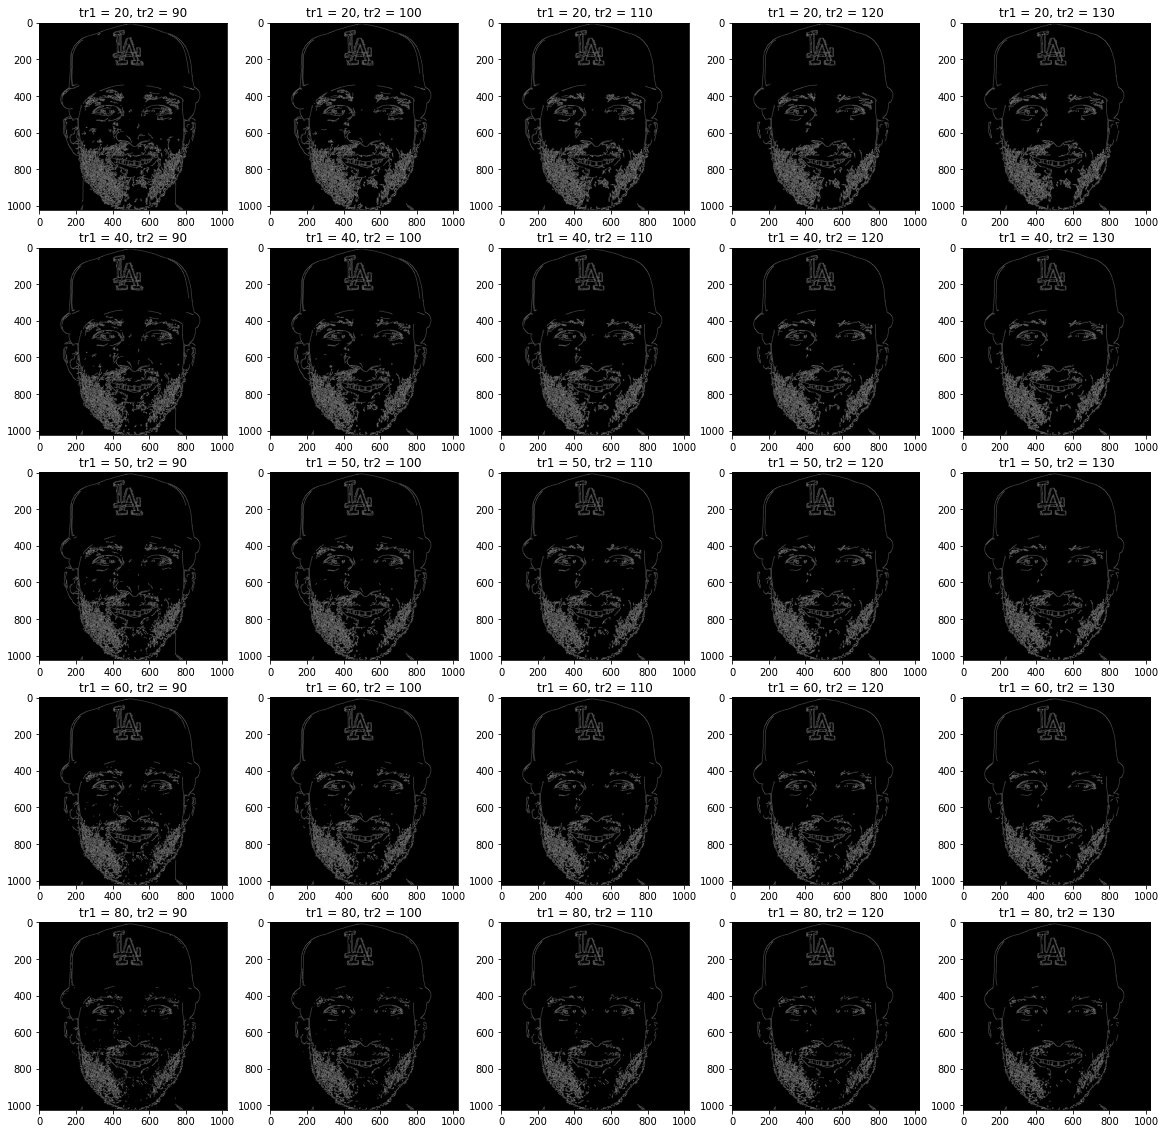

In [15]:
find_treshold(img, [20, 40, 50, 60, 80], [90, 100, 110, 120, 130])
#treshold1 = 50, treshold2 = 110

In [16]:
test_imgs_num = [random.randrange(0, len(dataset), 1) for i in range(15)]
test_imgs_num

[13392,
 19860,
 5346,
 18323,
 23668,
 14601,
 496,
 17281,
 11684,
 20065,
 7819,
 13377,
 14406,
 19193,
 7390]

In [17]:
def show_imgs(vec = None):
    row_num = 3
    col_num = 5
    fig, axis = plt.subplots(row_num, col_num, figsize=(col_num*4, row_num*4))

    for i in range(row_num):
        for j in range(col_num):
            if vec is None:
                img = dataset[random.randrange(0, len(dataset), 1)]
            else:
                img = dataset[vec[i*col_num + j]]
            axis[i, j].imshow(img)

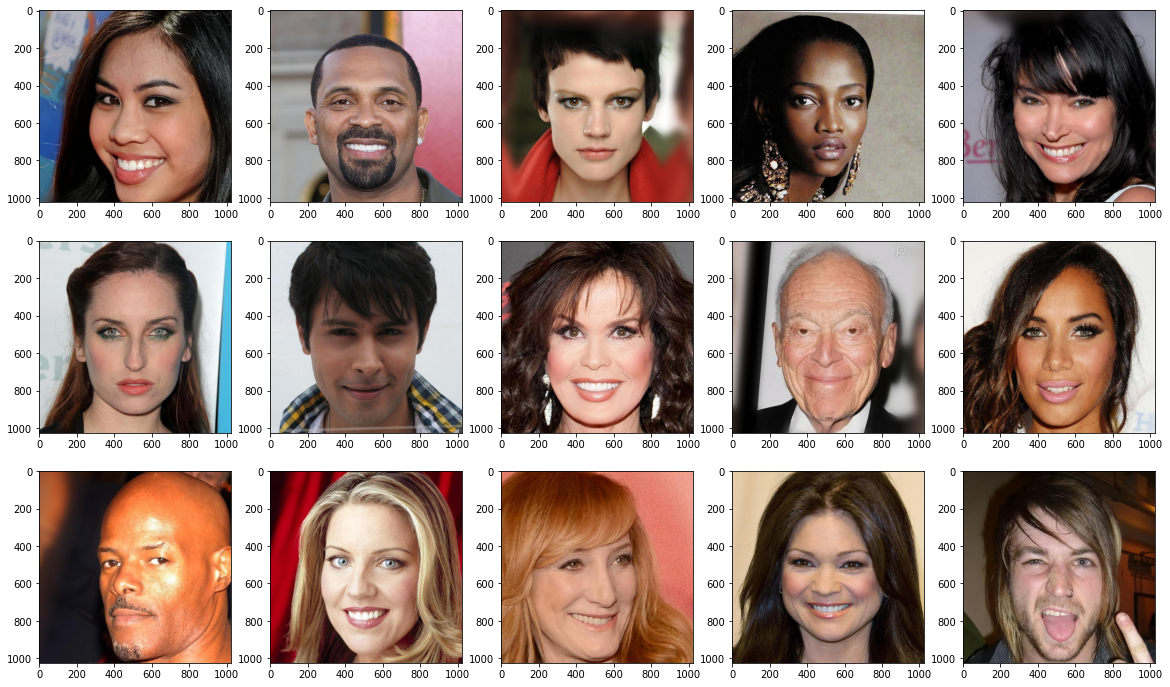

In [18]:
show_imgs(test_imgs_num)

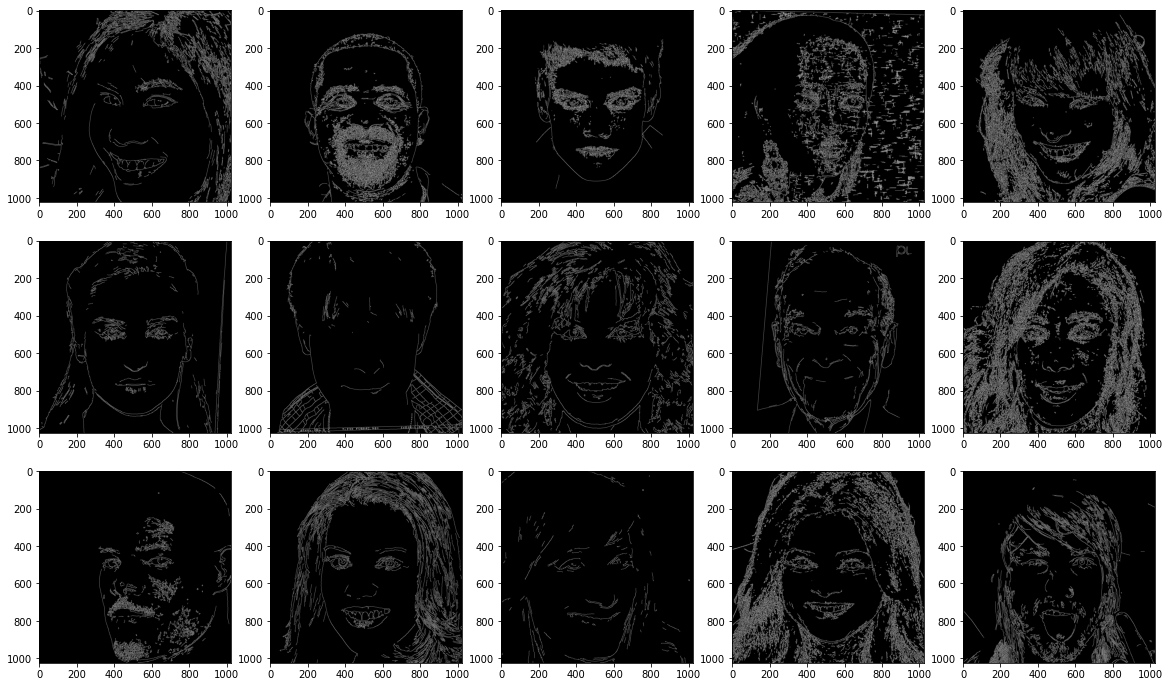

In [19]:
show_edges(test_imgs_num, 50, 110)